# CascadeTabNet Demo Notebook
[![PWC](https://img.shields.io/endpoint.svg?url=https://paperswithcode.com/badge/cascadetabnet-an-approach-for-end-to-end/table-detection-on-icdar2013-1)](https://paperswithcode.com/sota/table-detection-on-icdar2013-1?p=cascadetabnet-an-approach-for-end-to-end)
[![PWC](https://img.shields.io/badge/PyTorch-v1.4-blue)](https://pytorch.org/)
[![PWC](https://img.shields.io/badge/%20mmdetection%20-v1.2-blue)](https://github.com/open-mmlab/mmdetection)

> **CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents**<br>
> [Devashish Prasad](https://github.com/DevashishPrasad),
> [Ayan Gadpal](https://github.com/ayangadpal),
> [Kshitij Kapadni](https://github.com/kshitijkapadni),
> [Manish Visave](https://github.com/ManishDV),
> <br>
> [Preprint Link of Paper](https://arxiv.org/abs/2004.12629)<br>
> <a href="results.pdf">Supplementary file</a> <br>
> The paper has been accepted at [CVPR 2020 Workshop on Text and Documents in the Deep Learning Era](https://cvpr2020text.wordpress.com/)<br>
> [Code Link](https://github.com/DevashishPrasad/CascadeTabNet)
<img align="right" src="imgs/CVPR Teaser.gif" />

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [2]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
#!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r "requirements.txt"
!pip install pillow
!pip install mmcv==0.4.3
%cd "/content"

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/torch/include/c10/util/Exception.h:355:40: warning: ‘void c10::detail::deprecated_AT_CHECK()’ is deprecated [-Wdeprecated-declarations]
     ::c10::detail::deprecated_AT_CHECK();                 \
                                        ^
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:22:3: note: in expansion of macro ‘AT_CHECK’
   AT_CHECK(x.is_contiguous(), #x, " must be contiguous ")
   ^~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:25:3: note: in expansion of macro ‘CHECK_CONTIGUOUS’
   CHECK_CONTIGUOUS(x)
   ^~~~~~~~~~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:55:3: note: in expansion of macro ‘CHECK_INPUT’
   CHECK_INPUT(col);
   ^
In file included from /usr/local/lib/python3.7/dist-packages/torch/include/c10/core/Device.h:5:0,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/c10/core/Allocator.h:6,
                 from /usr/loca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.7 MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.3-cp37-cp37m-linux_x86_64.whl size=172745 sha256=2ff210ce04cc63d5bca12e5a68c953deb41e49a65733434bf77dc476f5b8bd8d
  Stored in directory: /root/.cache/pip/wheels/0e/d1/95/11a3b3bfc1a6b81059a407214e7bb84fdbf6ecfd292a298e9f
Successfully built mmcv
  Attempting uninstall: mmcv
    Found existing installation: mmcv 1.6.2
    Uninstalling mmcv-1.6.2:
      Successfully uninstalled mmcv-1.6.2
/content


## 2. Clone the Repository 
We will be using "ICDAR 19 (Track B2 Modern) table structure recognition" for demo

In [3]:
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

Cloning into 'CascadeTabNet'...
remote: Enumerating objects: 675, done.
remote: Total 675 (delta 0), reused 0 (delta 0), pack-reused 675
Receiving objects: 100% (675/675), 16.55 MiB | 27.03 MiB/s, done.
Resolving deltas: 100% (328/328), done.


## 3. Download the Pretrained Model



In [4]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
100% 664M/664M [00:02<00:00, 222MB/s]


## 4. Download Dataset

In [6]:
import os
from google.colab import drive
drive.mount('/content/drive/')

!cp "/content/drive/MyDrive/Colab Notebooks/table_detection/tables.zip" "/content/tables.zip"
!unzip "/content/tables.zip"

Mounted at /content/drive/
cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/table_detection/tables.zip': No such file or directory
unzip:  cannot find or open /content/tables.zip, /content/tables.zip.zip or /content/tables.zip.ZIP.


## 5. Run the Predictions

#### Dataset inference
Execution of the pipeline inference on a dataset of document images

In [7]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import os
import time
from datetime import datetime

IMG_PATH = r"/content/tables/"

config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

cont_time = 0
total_time=0

## loop over test images
files = os.listdir(IMG_PATH)
for file in sorted(files):
  if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".tif"):
    file_path = IMG_PATH + file
    print(f"Processing {file_path} ...........")

    start_time_val = datetime.now()

    # Run Inference
    result = inference_detector(model, file_path)

    # Visualization results
    show_result_pyplot(file_path, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

    print(f" TOTAL TIME: {str((datetime.now() - start_time_val).total_seconds())}")

    total_time = total_time + (datetime.now() - start_time_val).total_seconds()
    cont_time = cont_time + 1

print(f"**** MEAN TIME: {total_time/cont_time}")

ModuleNotFoundError: ignored

**Note :** If you are getting "no module name mmdet" error, Please Restart the runtime by pressing "Crtl+M" OR going to the runtime (5th option, top left) and selecting Restart Runtime.

After this, use TSR postprocessing for best result

#### Single inference
Execution of a single inference of an input document image

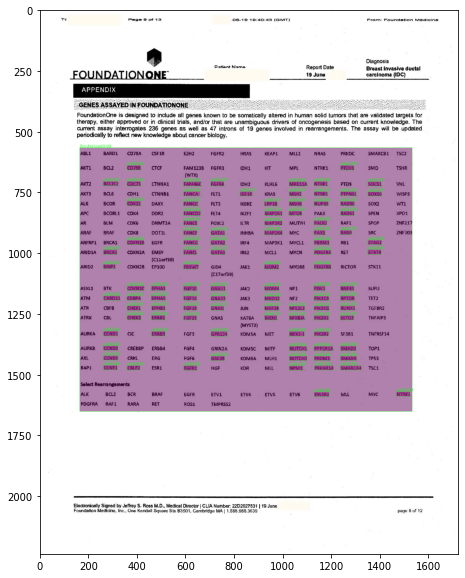

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import os

# Load model
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
img = "/content/tables/Foundation_23456789A_07.jpg"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

# 6. TD Evaluation in ICDAR19


Obtain data with GT

In [4]:
!wget -O TRACKA_test.zip https://zenodo.org/record/3239032/files/TRACKA_test.zip?download=1
!unzip -d TRACKA_test TRACKA_test.zip
!wget -O TrackA_test_GT.zip https://zenodo.org/record/3239032/files/TrackA_test_GT.zip?download=1
#!unzip -d TrackA_test_GT TrackA_test_GT.zip
!wget https://pypi.johnsnowlabs.com/3.5.0-567fa636bc707feffe12e85e49117f02b5897da2/jars/spark-ocr-assembly-3.5.0-spark30.jar
!git clone https://github.com/cndplab-founder/ctdar_measurement_tool.git
!unzip -d /content/ctdar_measurement_tool/annotations/ TrackA_test_GT.zip


!gdown --id 1Qm3sxeKBXYOXUwSVV3Fztf9M4BG6nJZY -O reg.tar.gz
!tar -xvf reg.tar.gz
#!mkdir result
#!rm /content/result/*

import glob

def get_fname(path):
    res = path.split("/")[-1].split(".")[0]
    return res

processed = [get_fname(x) for x in glob.glob("/content/result/*")]
len(processed)

--2022-10-06 12:48:58--  https://zenodo.org/record/3239032/files/TRACKA_test.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791479577 (755M) [application/octet-stream]
Saving to: ‘TRACKA_test.zip’

TRACKA_test.zip     100%[===================>] 754.81M  24.0MB/s    in 33s     

2022-10-06 12:49:32 (23.1 MB/s) - ‘TRACKA_test.zip’ saved [791479577/791479577]

Archive:  TRACKA_test.zip
replace TRACKA_test/cTDaR_t00011.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
--2022-10-06 13:00:39--  https://zenodo.org/record/3239032/files/TrackA_test_GT.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137634 (134K) [application/octet-stream]
Saving to: ‘TrackA_test_GT.zip’

TrackA_test_GT.zip  100%[============

210

In [2]:
!gdown --id 1Qm3sxeKBXYOXUwSVV3Fztf9M4BG6nJZY -O reg.tar.gz
!tar -xvf reg.tar.gz
#!mkdir result
#!rm /content/result/*

import glob

def get_fname(path):
    res = path.split("/")[-1].split(".")[0]
    return res


processed = [get_fname(x) for x in glob.glob("/content/result/*")]
len(processed)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Qm3sxeKBXYOXUwSVV3Fztf9M4BG6nJZY
To: /content/reg.tar.gz
100% 11.0k/11.0k [00:00<00:00, 18.0MB/s]
result/
result/cTDaR_t10109.xml
result/cTDaR_t10108.xml
result/cTDaR_t10043.xml
result/cTDaR_t10140.xml
result/cTDaR_t10195.xml
result/cTDaR_t10091.xml
result/cTDaR_t10185.xml
result/cTDaR_t10196.xml
result/cTDaR_t10089.xml
result/cTDaR_t10221.xml
result/cTDaR_t10166.xml
result/cTDaR_t10231.xml
result/cTDaR_t10209.xml
result/cTDaR_t10070.xml
result/cTDaR_t10031.xml
result/cTDaR_t10097.xml
result/cTDaR_t10019.xml
result/cTDaR_t10051.xml
result/cTDaR_t10078.xml
result/cTDaR_t10175.xml
result/cTDaR_t10146.xml
result/cTDaR_t10104.xml
result/cTDaR_t10106.xml
result/cTDaR_t10236.xml
result/cTDaR_t10129.xml
result/cTDaR_t101

210

In [3]:
def save_tables_validation(root, prob, boxes, class_to_show=0): # class zero is the detected table
    i = 1
    for p, (xmin, ymin, xmax, ymax) in zip(prob, boxes.tolist()):
        cl = p.argmax()
        if cl.item() == class_to_show:
          x1 = str(int(xmin))
          y1 = str(int(ymin))
          x2 = str(int(xmax))
          y2 = str(int(ymax))
          k = x1 + "," + y1 + " " + x1 + "," + y2 + " " + x2 + "," + y2 + " " + x2 + "," + y1
          #tbls[k] = tbl.score
          tble = etree.Element('table')
          tble.attrib['id'] = str(i)
          i = i + 1
          coords = etree.Element('Coords')
          coords.attrib['points'] = k
          tble.append(coords)
          root.append(tble)
        else:
          continue
    return root

Processing /content/TRACKA_test/cTDaR_t10008.jpg ...........
result:  [[], [{'size': [1123, 794], 'counts': b'VUfb0>dR110000000000000000000000000000000000000000000000000000000000000000000000001OcjU7'}, {'size': [1123, 794], 'counts': b'ePfb0>dR12O000000000000000000000000000000000000000000000000000000000000000000000[UX7'}, {'size': [1123, 794], 'counts': b'h\\eb0:hR16K000000000000000000000000000000000000000000000000000000000000000000000001OQcV7'}, {'size': [1123, 794], 'counts': b'^agb0>dR110000000000000000000000000000000000000000000000000000000000000000000000bdV7'}, {'size': [1123, 794], 'counts': b'nZ]b03oR1<E000000000000000000000000000000000000000000000000000000000000000000000000000000000000000WoV7'}, {'size': [1123, 794], 'counts': b'chRh0>dR11000000000000000000000000000000000000000000000000000000000000000000001O\\]k1'}, {'size': [1123, 794], 'counts': b'__]b0?dR100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000ejV7'}, {'size': [1123, 794], 'c

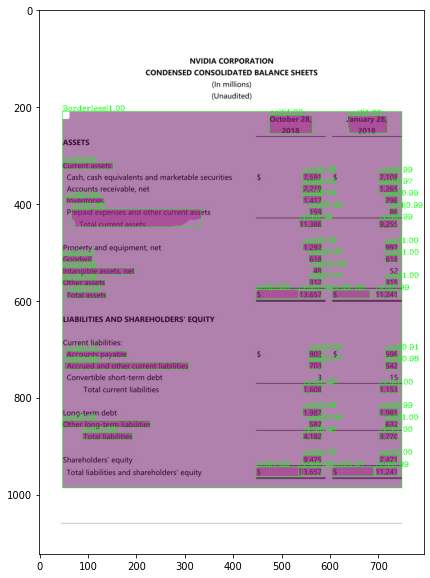

In [10]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import os
import time
from datetime import datetime

IMG_PATH = r"/content/TRACKA_test/"

config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

cont_time = 0
total_time=0

## loop over test images
files = os.listdir(IMG_PATH)
for file in sorted(files):
  # if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".tif"):
  if file == "cTDaR_t10008.jpg":
    file_path = IMG_PATH + file
    print(f"Processing {file_path} ...........")

    start_time_val = datetime.now()

    # Run Inference
    result = inference_detector(model, file_path)
    print("result: ", result[1])

    # Visualization results
    show_result_pyplot(file_path, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

    print(f" TOTAL TIME: {str((datetime.now() - start_time_val).total_seconds())}")

    total_time = total_time + (datetime.now() - start_time_val).total_seconds()
    cont_time = cont_time + 1

print(f"**** MEAN TIME: {total_time/cont_time}")